# Author - M.Gani95
- Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
- As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team

# Exploratory Data Analysis - Sports

As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
Suggest teams or players a company should endorse for its products. 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [38]:
#load the datasets 
matches = pd.read_csv("matches.csv")
#deliveries = pd.read_csv("deliveries.csv")

In [39]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [40]:
matches.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [41]:
matches.drop(['umpire3'],inplace=True,axis=1)

matches.at[[461,462,466,468,474,476],'city'] = 'Abu Dhabi'
matches.at[469,'city'] = 'Sharjah'
matches.winner.fillna('Draw',inplace=True)
matches.player_of_match.fillna('No',inplace=True)

#matches[pd.isnull(matches.umpire1)]
matches.at[4,'umpire1'] =  'Sundaram Ravi' 
matches.at[4,'umpire2'] =  'Virender Sharma' 

matches.at[753,'umpire1'] =  'Bruce Oxenford' 
matches.at[753,'umpire2'] =  'Sundaram Ravi' 

matches.loc[matches['team1']=='Rising Pune Supergiant','team1'] = 'Rising Pune Supergiants'
matches.loc[matches['team2']=='Rising Pune Supergiant','team2'] = 'Rising Pune Supergiants'

In [42]:
matches[['season','city','winner','venue','player_of_match']].groupby('season').tail(1).sort_values(by='season')
#['winner'].value_counts().plot(kind="bar",figsize=(8,5),yticks=range(1,5),alpha=0.8,legend='No. of Season Winner')

,season,city,winner,venue,player_of_match
116,2008,Mumbai,Rajasthan Royals,Dr DY Patil Sports Academy,YK Pathan
173,2009,Johannesburg,Deccan Chargers,New Wanderers Stadium,A Kumble
233,2010,Mumbai,Chennai Super Kings,Dr DY Patil Sports Academy,SK Raina
306,2011,Chennai,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",M Vijay
380,2012,Chennai,Kolkata Knight Riders,"MA Chidambaram Stadium, Chepauk",MS Bisla
456,2013,Kolkata,Mumbai Indians,Eden Gardens,KA Pollard
516,2014,Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,MK Pandey
575,2015,Kolkata,Mumbai Indians,Eden Gardens,RG Sharma
635,2016,Bangalore,Sunrisers Hyderabad,M Chinnaswamy Stadium,BCJ Cutting
58,2017,Hyderabad,Mumbai Indians,"Rajiv Gandhi International Stadium, Uppal",KH Pandya


In [43]:
df = matches[['season','team1','team2','toss_winner','toss_decision','winner','venue']]

In [9]:
data = list()
for year1 in df.season.unique():    
    for team in df.team1.unique():
        win = df.winner[(df['winner']==team) & (df.season == year1)].count()
        loss = df.winner[(df.season == year1) & ((df['team1']==team) | (df['team2']==team)) & (df['winner']!=team)].count()
        if win!=0 and loss!=0:
            data.append({'season': year1,'team': team,'win':win,'loss':loss})
winlossData = pd.DataFrame(data)

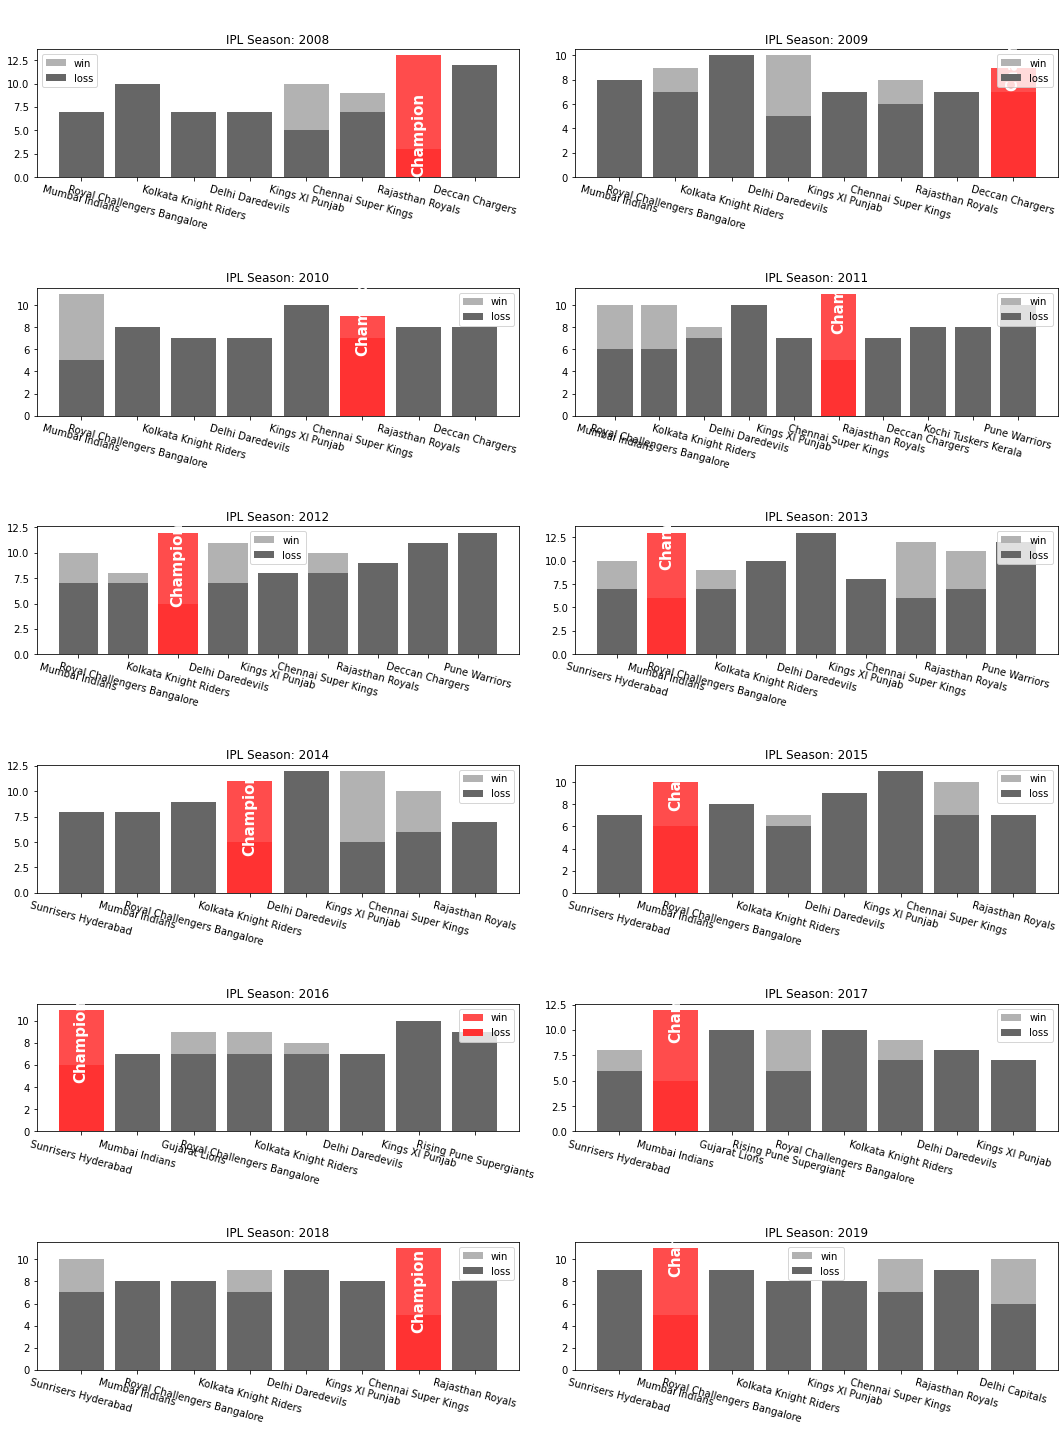

In [48]:
file = matches[['season','winner']].groupby('season').tail(1).sort_values(by='season')
plt.figure(figsize=(15,20))
n = round(len(winlossData.season.unique())/2)
j,i=0,1
season = [year for year in winlossData.season.unique()]

for year1 in sorted(season):  
    plt.subplot(n, 2, i)
    plt.title("IPL Season: "+ str(year1))    
    plt.tight_layout()
    
    team = winlossData.loc[(winlossData.season==year1), 'team'].to_list()
    win = winlossData.loc[(winlossData.season==year1), 'win'].to_list()
    loss = winlossData.loc[(winlossData.season==year1), 'loss'].to_list()
        
    winclrs = ['#b2b2b2' if(x != file.winner.iloc[j] and year1==file.season.iloc[j]) else '#ff4c4c' for x in team ]
    lossclrs = ['#666666' if(x != file.winner.iloc[j] and year1==file.season.iloc[j]) else '#ff3232' for x in team ]
        
    plt.bar(team,win,color=winclrs)
    plt.bar(team,loss,color=lossclrs)
    
    xmax = file.winner.iloc[j] #Season Champion
    xpos = team.index(xmax) #matches won    
    ymax = win[value]
    
    plt.annotate("Champion",xy=(xmax,ymax),xytext=(xmax, ymax+5),weight='bold',rotation='vertical',ha='center',va='top',size=15,color='#FFF')
    plt.legend(["win","loss"])
    plt.xticks(rotation=-15)
    j+=1
    i+=1   


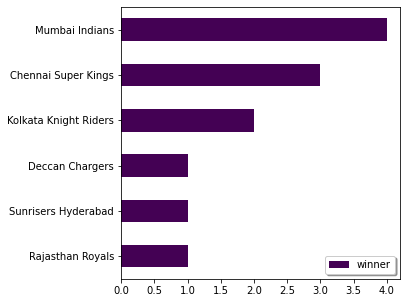

In [135]:
file.winner.value_counts().sort_values().plot(kind="barh",figsize=(5, 5),fontsize=10,cmap='viridis')
plt.legend(shadow=True)

## If Team Won the TOSS & Also WIN Match

Text(0.5, 1.0, 'Loss Toss Win Match')

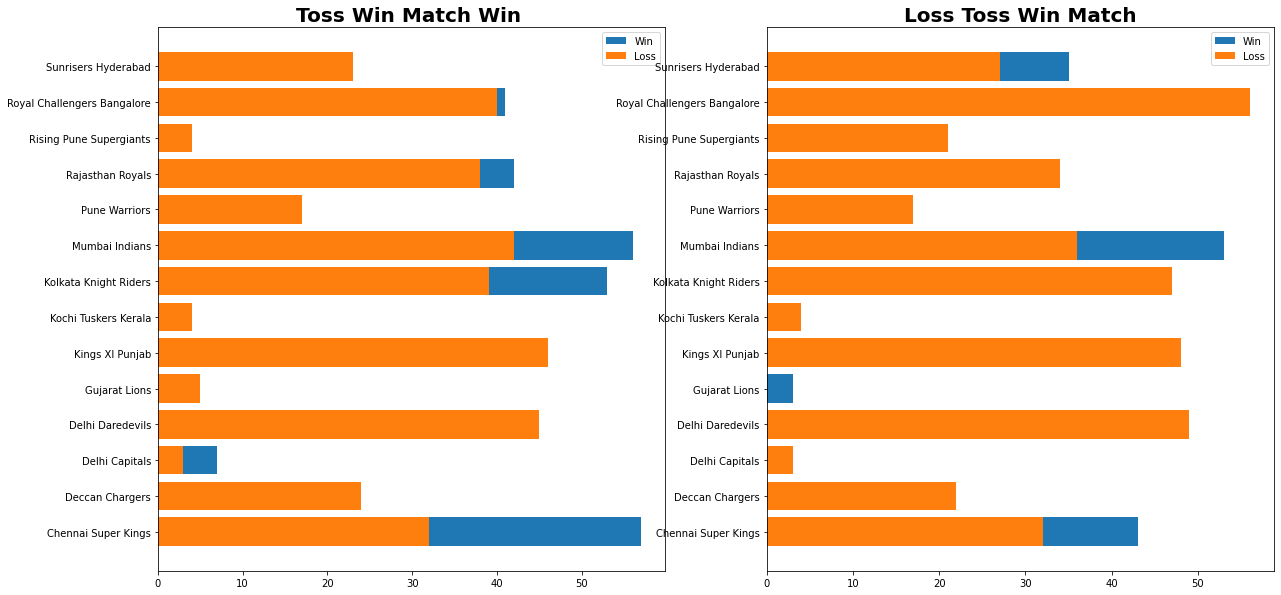

In [65]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
# If team won the toss and win matches
team1 = matches[['season','team1','toss_winner','winner']].loc[(matches['team1']==matches['toss_winner']) & (matches['team1']==matches['winner'])].groupby('team1')['winner'].count()#.sum()#.plot(kind='barh')
team2 = matches[['season','team2','toss_winner','winner']].loc[(matches['team2']==matches['toss_winner']) & (matches['team2']==matches['winner'])].groupby('team2')['winner'].count()#.plot(kind='barh')

tossWin = pd.DataFrame(team1+team2)

# If team won the toss and loss matches
team1 = matches[['season','team1','toss_winner','winner']].loc[(matches['team1']==matches['toss_winner']) & (matches['team1']!=matches['winner'])].groupby('team1')['winner'].count()
team2 = matches[['season','team2','toss_winner','winner']].loc[(matches['team2']==matches['toss_winner']) & (matches['team2']!=matches['winner'])].groupby('team2')['winner'].count()
tossWin['loss'] = team1 + team2

plt.barh(tossWin.index,tossWin.winner,label='Win')
plt.barh(tossWin.index,tossWin.loss,label='Loss')
plt.legend()
plt.title("Toss Win Match Win ", fontsize = 20, fontweight = 'bold')

plt.subplot(1,2,2)
# If team won the toss and win matches
team1 = matches[['season','team1','toss_winner','winner']].loc[(matches['team1']!=matches['toss_winner']) & (matches['team1']==matches['winner'])].groupby('team1')['winner'].count()#.sum()#.plot(kind='barh')
team2 = matches[['season','team2','toss_winner','winner']].loc[(matches['team2']!=matches['toss_winner']) & (matches['team2']==matches['winner'])].groupby('team2')['winner'].count()#.plot(kind='barh')

tossWin = pd.DataFrame(team1+team2)

# If team won the toss and loss matches
team1 = matches[['season','team1','toss_winner','winner']].loc[(matches['team1']!=matches['toss_winner']) & (matches['team1']!=matches['winner'])].groupby('team1')['winner'].count()
team2 = matches[['season','team2','toss_winner','winner']].loc[(matches['team2']!=matches['toss_winner']) & (matches['team2']!=matches['winner'])].groupby('team2')['winner'].count()
tossWin['loss'] = team1 + team2

plt.barh(tossWin.index,tossWin.winner,label='Win')
plt.barh(tossWin.index,tossWin.loss,label='Loss')
plt.legend()
plt.title("Loss Toss Win Match", fontsize = 20, fontweight = 'bold')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

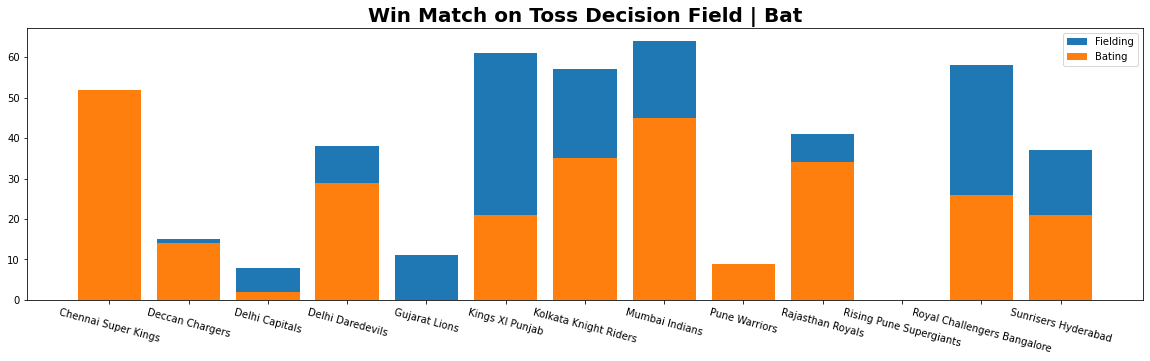

In [89]:
plt.figure(figsize=(20,5))


team1 = matches[['team1','toss_decision','winner']].loc[(matches['toss_decision']=='bat') & (matches['team1']==matches['winner'])].groupby('team1')['winner'].count()
team2 = matches[['team2','toss_decision','winner']].loc[(matches['toss_decision']=='bat') & (matches['team2']==matches['winner'])].groupby('team2')['winner'].count()

chooseDecision = pd.DataFrame(team1+team2)

team1 = matches[['team1','toss_decision','winner']].loc[(matches['toss_decision']=='field') & (matches['team1']==matches['winner'])].groupby('team1')['winner'].count()
team2 = matches[['team2','toss_decision','winner']].loc[(matches['toss_decision']=='field') & (matches['team2']==matches['winner'])].groupby('team2')['winner'].count()
chooseDecision['loss'] = team1 + team2



plt.bar(chooseDecision.index,chooseDecision.loss,label='Fielding')
plt.bar(chooseDecision.index,chooseDecision.winner,label='Bating')
plt.legend()
plt.title("Win Match on Toss Decision Field | Bat", fontsize = 20, fontweight = 'bold')
plt.xticks(rotation=-15)


#team2 = matches[['team2','toss_winner','toss_decision','winner']].loc[(matches['team2']==matches['toss_winner']) & (matches['toss_decision']=='field') & (matches['team2']==matches['winner'])].value_counts().groupby('team2').sum()

## How toss decision affects match results?

E:\Developer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

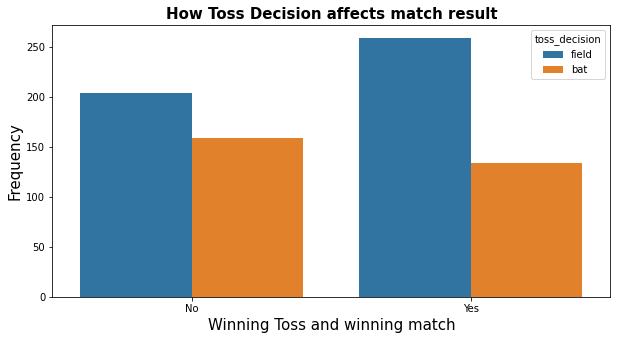

In [29]:

matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize = (10,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=15,fontweight="bold")

plt.xlabel("Winning Toss and winning match", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

## Venue Where Maximum Matches Ocuurs

<AxesSubplot:ylabel='city'>

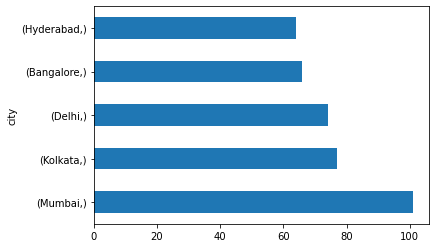

In [23]:
matches[['city']].value_counts().head().plot(kind='barh')

## Players of matches In each Season

<AxesSubplot:title={'center':'IPL Season: 2019'}>

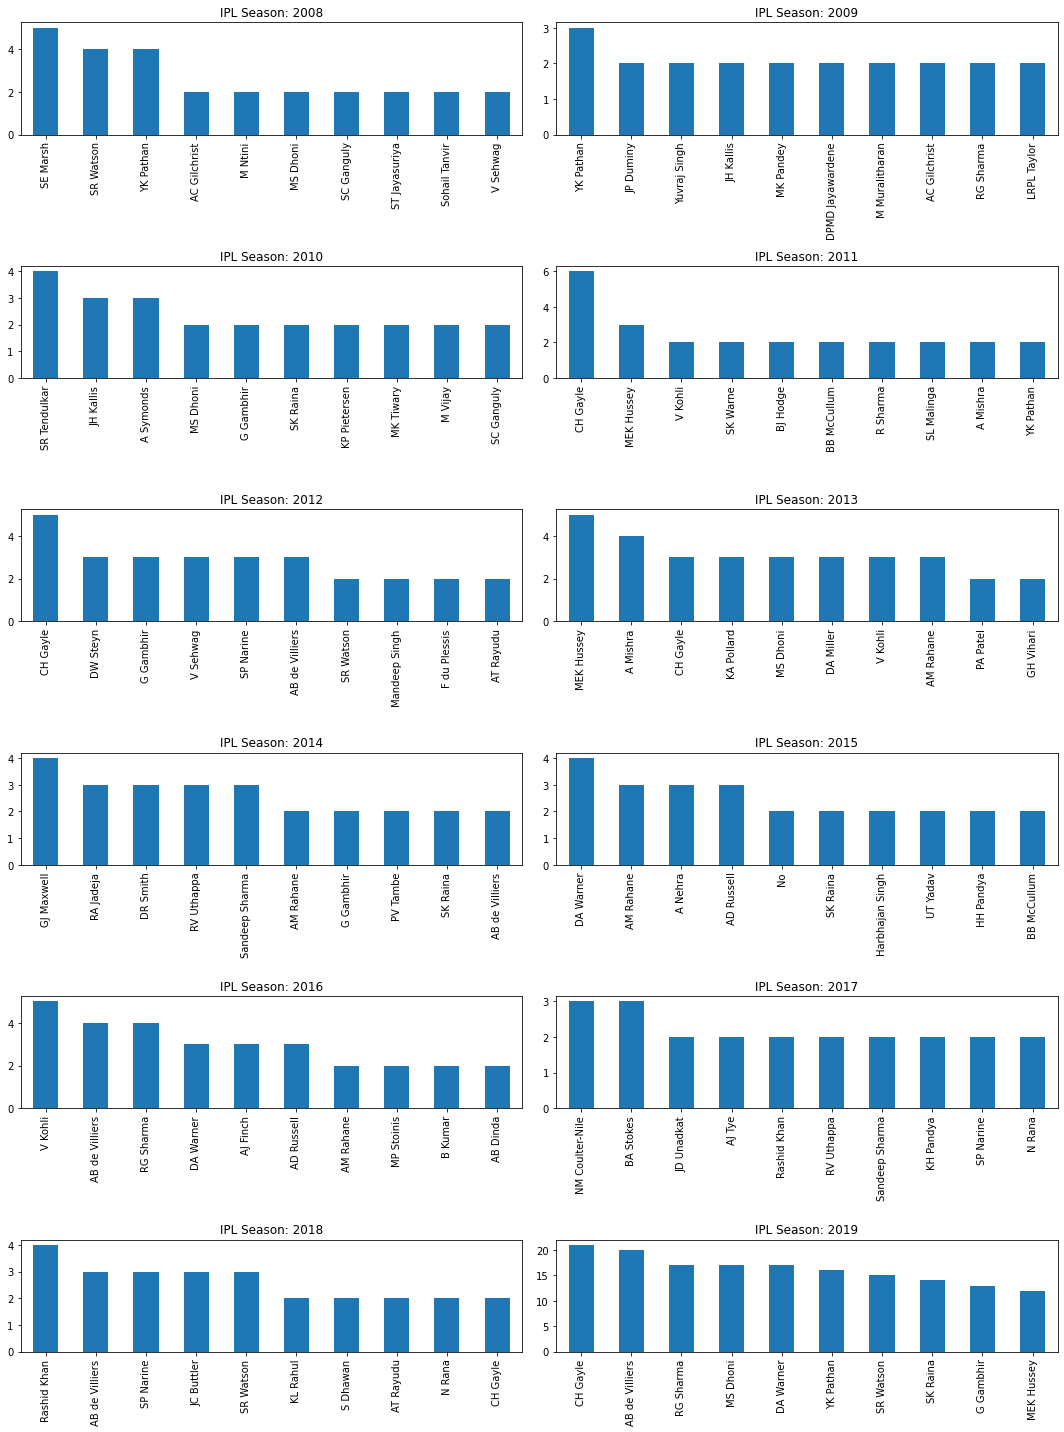

In [64]:
plt.figure(figsize=(15,20))
n = round(len(matches.season.unique())/2)
i=1
season = [year for year in matches.season.unique()]

for year1 in sorted(season):  
    plt.subplot(n, 2, i)
    plt.title("IPL Season: "+ str(year1))    
    plt.tight_layout()
    
    matches['player_of_match'].loc[(matches.season==year1)].value_counts().head(10).plot(kind='bar')
    i+=1           

<AxesSubplot:title={'center':'Most Player of match in ALL IPL Season'}>

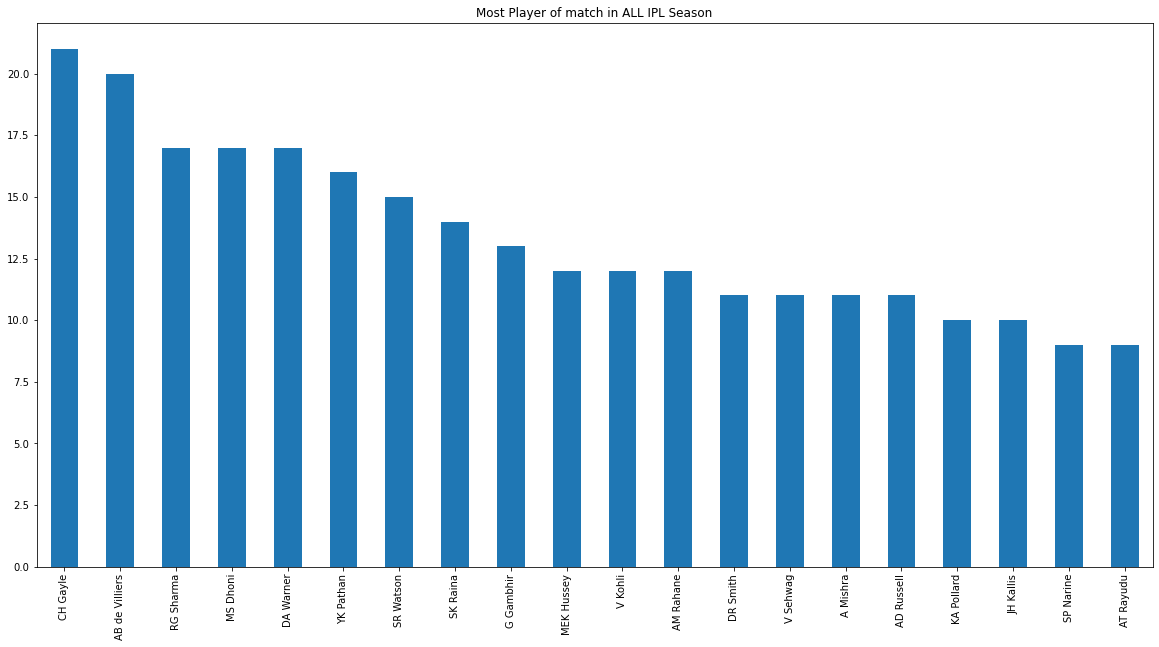

In [68]:
plt.figure(figsize=(20,10))
plt.title("Most Player of match in ALL IPL Season")
matches['player_of_match'].value_counts().head(20).plot(kind='bar') 

In [79]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [84]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [100]:
deliveries.iloc[0]

match_id                                      1
inning                                        1
batting_team                Sunrisers Hyderabad
bowling_team        Royal Challengers Bangalore
over                                          1
ball                                          1
batsman                               DA Warner
non_striker                            S Dhawan
bowler                                 TS Mills
is_super_over                                 0
wide_runs                                     0
bye_runs                                      0
legbye_runs                                   0
noball_runs                                   0
penalty_runs                                  0
batsman_runs                                  0
extra_runs                                    0
total_runs                                    0
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                 

In [106]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [111]:
deliveries[pd.notnull(deliveries.fielder)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
165,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,3,CH Gayle,TM Head,DJ Hooda,0,...,0,0,0,0,0,0,0,CH Gayle,caught,DA Warner
199,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,4,KM Jadhav,TM Head,MC Henriques,0,...,0,0,0,0,1,0,1,KM Jadhav,run out,BCJ Cutting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178977,11415,2,Chennai Super Kings,Mumbai Indians,4,6,F du Plessis,SR Watson,KH Pandya,0,...,0,0,0,0,0,0,0,F du Plessis,stumped,Q de Kock
179019,11415,2,Chennai Super Kings,Mumbai Indians,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock
179033,11415,2,Chennai Super Kings,Mumbai Indians,13,5,SR Watson,MS Dhoni,HH Pandya,0,...,0,0,0,0,1,0,1,MS Dhoni,run out,Ishan Kishan
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock


Text(0, 0.5, 'Total Runs Scored')

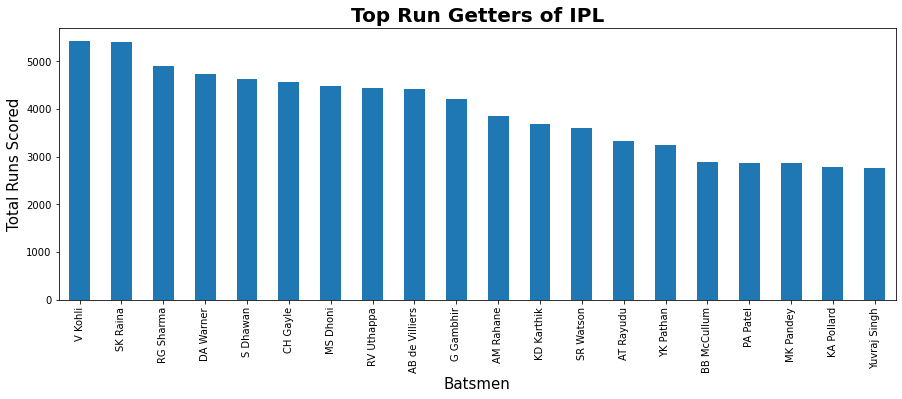

In [122]:
deliveries[['batsman','batsman_runs']].groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(20).plot(kind='bar',figsize=(15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 15)
plt.ylabel("Total Runs Scored", size = 15)

## Which bowlers have performed the best?

Text(0, 0.5, 'Total Wickets Taken')

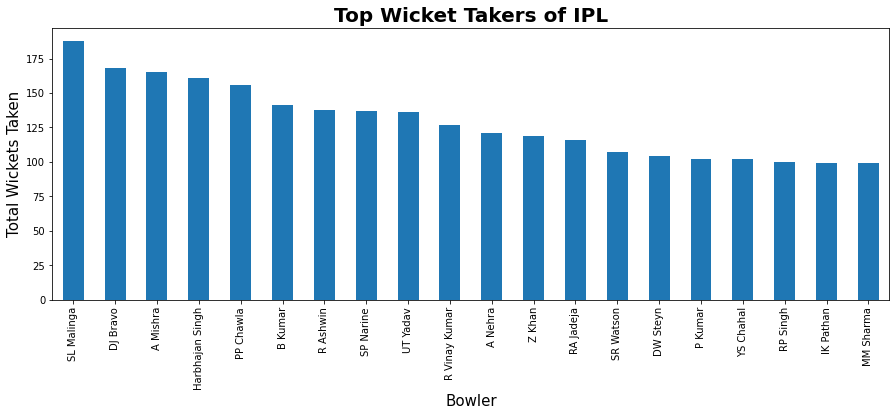

In [119]:
deliveries.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(20).plot(kind='bar',figsize=(15,5))

plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 15)
plt.ylabel("Total Wickets Taken", size = 15)

#merge.groupby('bowler')['player_dismissed'].count()

## Reason of Played Dissmissed in Season

<AxesSubplot:xlabel='dismissal_kind'>

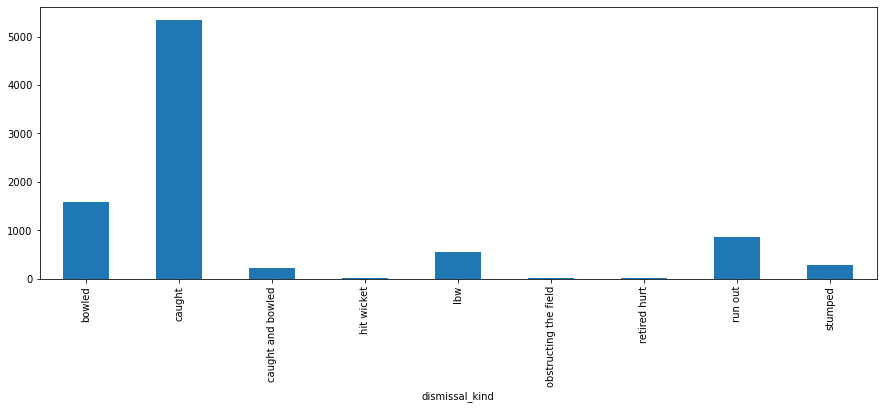

In [142]:
deliveries.groupby('dismissal_kind')['player_dismissed'].count().plot(kind='bar',figsize=(15,5))
#plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
#plt.xlabel("Bowler", size = 15)
#plt.ylabel("Total Wickets Taken" size = 15)

## Dismissed Style of Player

Text(0, 0.5, 'Total')

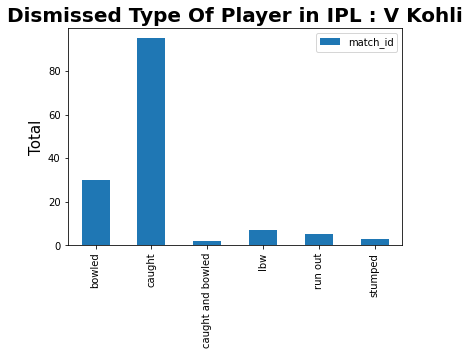

In [172]:
#deliveries.loc[(deliveries.batsman=='V Kohli') & (deliveries.player_dismissed=='V Kohli')].groupby(['player_dismissed','dismissal_kind'])['dismissal_kind'].count().plot(kind='bar')
deliveries.loc[(deliveries.batsman=='V Kohli') & (deliveries.player_dismissed=='V Kohli')].groupby(['player_dismissed','dismissal_kind']).count().reset_index().plot(kind='bar',x='dismissal_kind',y='match_id')
plt.title("Dismissed Type Of Player in IPL : V Kohli", fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel("Total", size = 15)

## Run Score Style of Player

batsman_runs
1    1741
2     586
3      33
4    1928
6    1146
Name: batsman_runs, dtype: int64


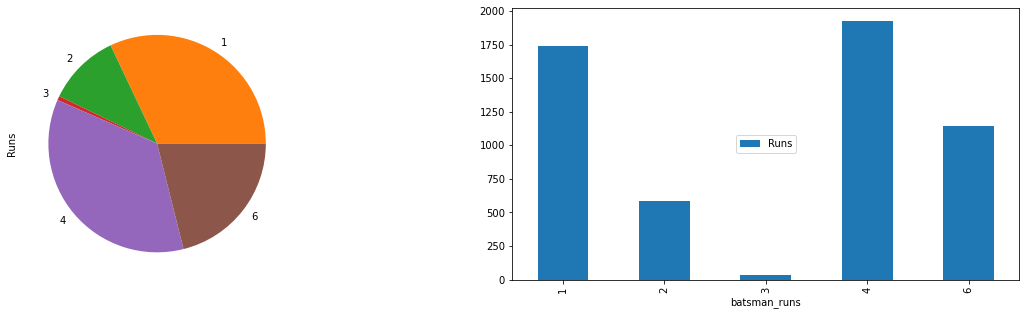

In [233]:
vKholi = deliveries[['batsman_runs']].loc[(deliveries.batsman=='V Kohli')].groupby('batsman_runs')['batsman_runs'].sum()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
vKholi.plot(kind='pie',label='Runs')
plt.subplot(1,2,2)
vKholi.iloc[1:].plot(kind='bar',label='Runs')
plt.legend(loc='center')
print(vKholi.iloc[1:])


# Now, We will merge the 2 datasets for better insights from the data

In [130]:
matchesId = matches.rename_axis('id').reset_index()

In [132]:
merge = pd.merge(deliveries,matchesId, left_on='match_id', right_on ='id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


Text(0, 0.5, 'Strike Rate')

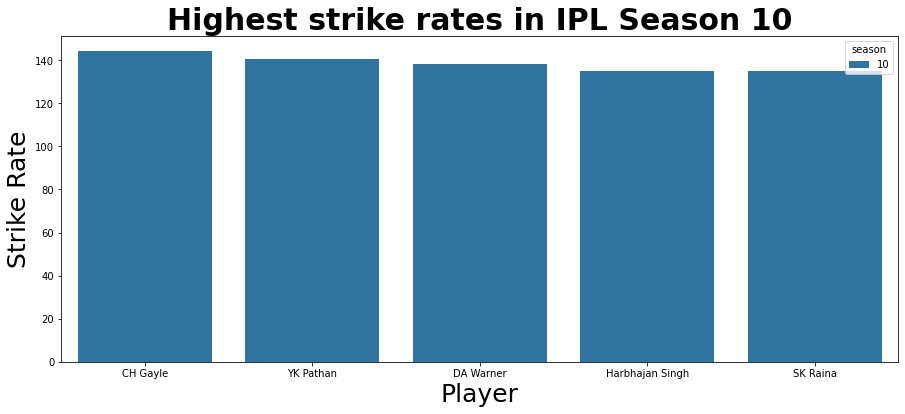

In [268]:
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(), hue = 'season')
plt.title("Highest strike rates in IPL Season 10",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)


In [90]:
balls_bowled = pd.DataFrame(merge.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(merge[merge['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
plt.figure(figsize = (15,6))
bowler_strike_rate[bowler_strike_rate.season.isin([10])].head().plot(kind='bar',x='bowler',y='strike_rate')
plt.title("Highest strike rates in IPL Season 10: Bowler",fontsize= 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Strike Rate", size = 25)

NameError: name 'merge' is not defined

##  As a sports analysts, The most successful teams, players & factors contributing win or loss of a team

> Mumbai Indians is the most successful team in IPL and has won the most number of toss.
- There were more matches won by chasing the total(419 matches) than defending(350 matches).
> Mumbai Indians Win Maximum No. of **Four Season Champion Title **.
- When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.
- The Mumbai city has hosted the most number of IPL matches.


> Chris Gayle has won the maximum number of player of the match title.

> Eden Gardens has hosted the maximum number of IPL Finals.

> If a team wins a toss choose to field first as it has highest probablity of winning

##  Suggest teams or players a company should endorse for its products. 


> If the franchise is looking for a consistant batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner...

> If the franchise need a wicket taking bowler then go for A Mishra ,Harbhajan Singh, PP Chawla